<a href="https://colab.research.google.com/github/emely3h/Geospatial_ML/blob/main/image_processing/filtering_spatial_domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtering in the spatial domain

### Prepare Colab, import dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#! ls
%cd drive/MyDrive/MachineLearning/
#! git clone https://github.com/emely3h/Geospatial_ML.git
%cd Geospatial_ML
! ls
#! git pull

/content/drive/.shortcut-targets-by-id/15HUD3sGdfvxy5Y_bjvuXgrzwxt7TzRfm/MachineLearning
/content/drive/.shortcut-targets-by-id/15HUD3sGdfvxy5Y_bjvuXgrzwxt7TzRfm/MachineLearning/Geospatial_ML
data_exploration  evaluation   models	    prepare_data    README.md
docs		  experiments  poetry.lock  pyproject.toml  requirements.txt


In [3]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from data_exploration.display_images import display 
import cv2 as cv
import tensorflow as tf
from skimage import color
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

In [4]:
total_tiles = 11121
train_tiles = 6672
test_val_tiles = 2224
data_path = "../data_colab/256_256"

In [5]:
mask  = np.load(os.path.join(data_path,'2022_06_20.npz'))['y_mask']
input  = np.load(os.path.join(data_path,'2022_06_20.npz'))['x_input']

print(mask.shape)
print(input.shape)

(761, 256, 256)
(761, 256, 256, 5)


In [6]:
selected_input = [input[19], input[26], input[27], input[31], input[32], input[36], input[37]]
selected_mask = [mask[19], mask[26], mask[27], mask[31], mask[32], mask[36], mask[37]]

## Convolution

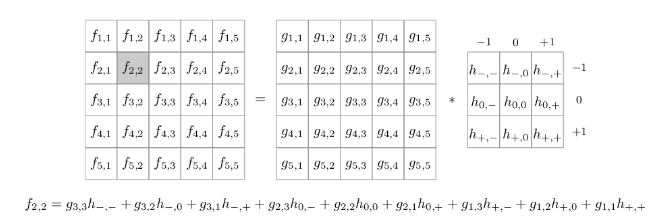

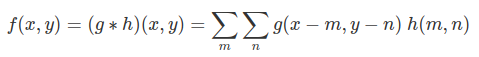

### Vertical Edge Detection Filter

[[10. 10. 10. 10. 10.  0.  0.  0.  0.  0.]
 [10. 10. 10. 10. 10.  0.  0.  0.  0.  0.]
 [10. 10. 10. 10. 10.  0.  0.  0.  0.  0.]
 [10. 10. 10. 10. 10.  0.  0.  0.  0.  0.]
 [10. 10. 10. 10. 10.  0.  0.  0.  0.  0.]
 [10. 10. 10. 10. 10.  0.  0.  0.  0.  0.]
 [10. 10. 10. 10. 10.  0.  0.  0.  0.  0.]
 [10. 10. 10. 10. 10.  0.  0.  0.  0.  0.]
 [10. 10. 10. 10. 10.  0.  0.  0.  0.  0.]
 [10. 10. 10. 10. 10.  0.  0.  0.  0.  0.]]


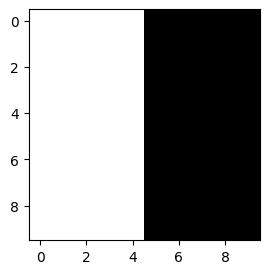

In [ ]:
image_size = 10
img = np.zeros((image_size,image_size))
img[:,:(image_size//2)] = 10
img[:,(image_size//2):] = 0
print(img)
plt.figure(figsize=(3,3))
plt.imshow(img, cmap='gray')
plt.show()

[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]



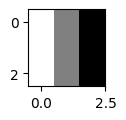

In [ ]:
kernel = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
print(kernel)
print()
plt.figure(figsize=(1,1))
plt.imshow(kernel, cmap='gray')
plt.show()

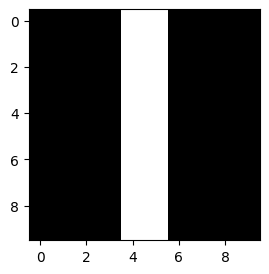

In [ ]:
result = cv.filter2D(img, -1, kernel)
plt.figure(figsize=(3,3))
plt.imshow(result, cmap='gray')
plt.show()

### Horizontal Edge Detection Filter


[[10. 10. 10. ... 10. 10. 10.]
 [10. 10. 10. ... 10. 10. 10.]
 [10. 10. 10. ... 10. 10. 10.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


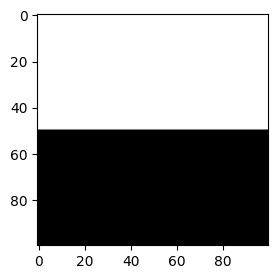

In [ ]:
image_size = 100
img = np.zeros((image_size,image_size))
img[:(image_size//2),:] = 10
print(img)
plt.figure(figsize=(3,3))
plt.imshow(img, cmap='gray')
plt.show()

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]



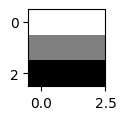

In [ ]:
kernel = np.array([[1,1, 1],[0, 0,0],[-1,-1,-1]])
print(kernel)
print()
plt.figure(figsize=(1,1))
plt.imshow(kernel, cmap='gray')
plt.show()

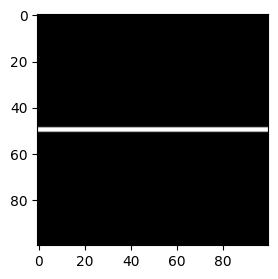

In [ ]:
result = cv.filter2D(img, -1, kernel)
plt.figure(figsize=(3,3))
plt.imshow(result, cmap='gray')
plt.show()

### Bluring using a box filter (averaging)
- convolution with a kernel where all values are the same
- the bigger the size of the kernel the bigger the smoothing effect
- kernel needs to be normalized (sum =1) otherwise unwanted darkening or brightness effects may occure

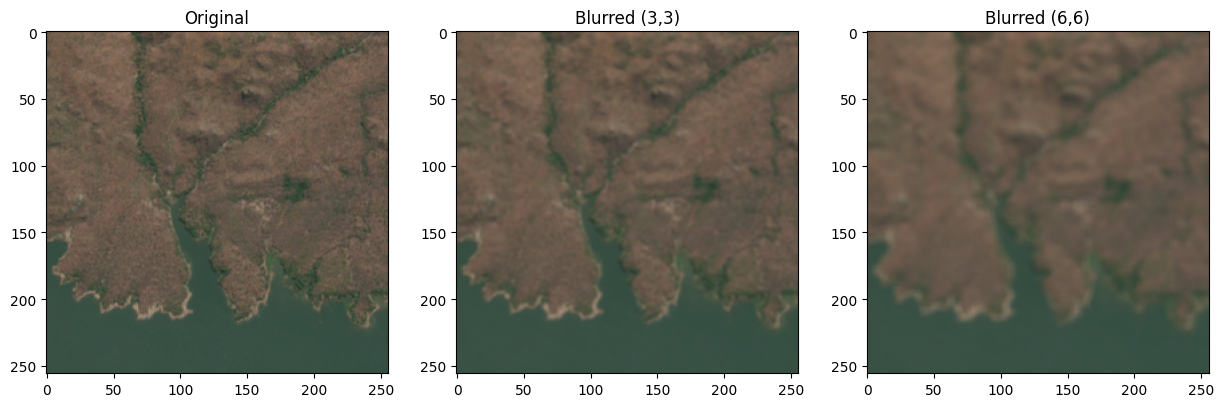

In [ ]:
kernel = np.ones((3,3),np.float32)/9
kernel2 = np.ones((6,6),np.float32)/36

img = np.array(input[0][:,:,:3], np.uint8)
blured = cv.filter2D(img,-1,kernel)
blured2 = cv.filter2D(img,-1,kernel2)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(img)
axs[0].set_title('Original')
axs[1].imshow(blured)
axs[1].set_title('Blurred (3,3)')
axs[2].imshow(blured2)
axs[2].set_title('Blurred (6,6)')
plt.show()

### Gaussian Filter

<img src="https://miro.medium.com/v2/resize:fit:376/0*Qyt87iKttnjvkxz8" >

<img src="https://miro.medium.com/v2/resize:fit:640/0*43h6WCpBGxHwdWoa" >

- very effective in removing noise
- convolution where the kernel is the gaussian function applied on a matrix 
- the bigger the standard deviation the smaller the smoothing effect as neighbouring pixels have a bigger influence
- the bigger the kernel size the bigger the smooting effect


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d7/Halftone%2C_Gaussian_Blur.jpg/220px-Halftone%2C_Gaussian_Blur.jpg"/>

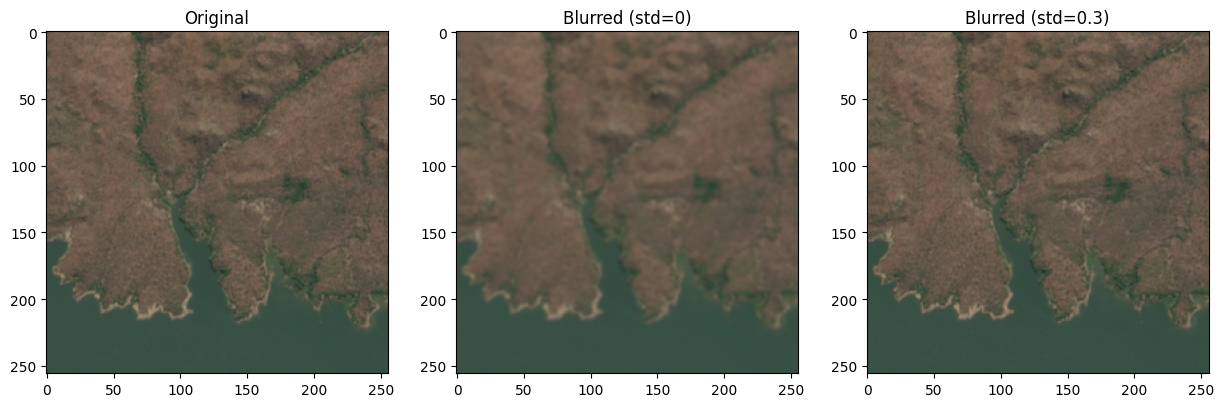

In [ ]:
kernel = np.ones((3,3),np.float32)/9
kernel2 = np.ones((6,6),np.float32)/36

img = np.array(input[0][:,:,:3], np.uint8)
blured = cv.GaussianBlur(img,(5,5),0)
blured2 = cv.GaussianBlur(img,(5,5),0.3)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(img)
axs[0].set_title('Original')
axs[1].imshow(blured)
axs[1].set_title('Blurred (std=0)')
axs[2].imshow(blured2)
axs[2].set_title('Blurred (std=0.3)')
plt.show()

### Laplacian Filter

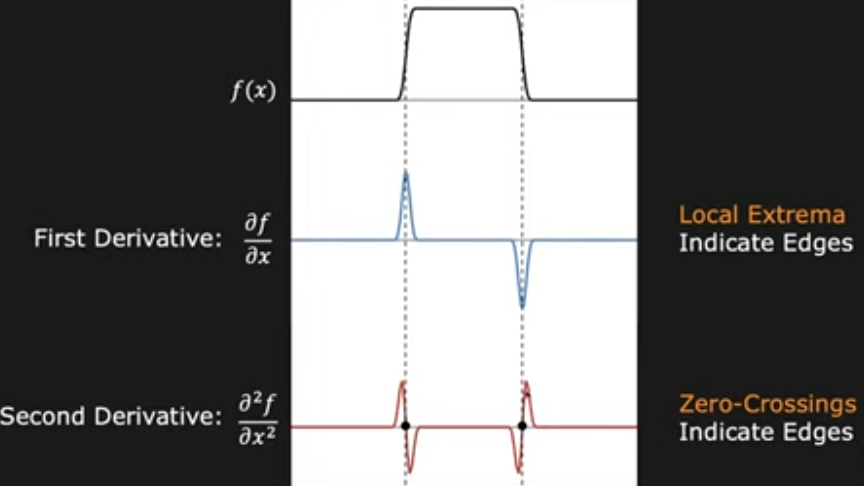

- laplacian filter captures the second derivative of pixel intensities, indicating the rate of change in intensity
- By convolving the Laplacian kernel with the image, we are applying a discrete approximation of the second derivative operation to the pixel intensities
- kernel: 
[[ 0,  1,  0],
 [ 1, -4,  1],
 [ 0,  1,  0]]
- does not detect orientation of edges

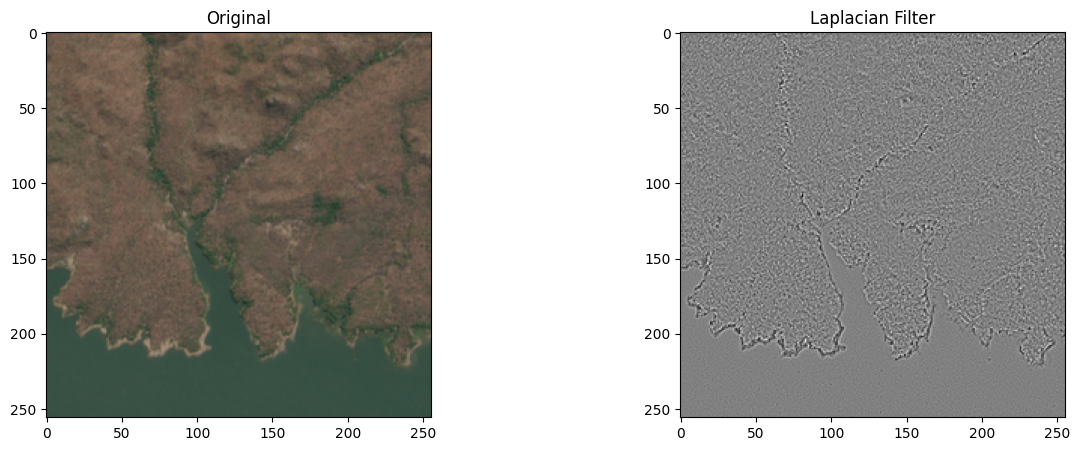

In [12]:
kernel = np.ones((3,3),np.float32)/9
kernel2 = np.ones((6,6),np.float32)/36

img = np.array(input[0][:,:,:3], np.uint8)

gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
laplacian = cv.Laplacian(gray_image, cv.CV_64F)
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(img)
axs[0].set_title('Original')
axs[1].imshow(laplacian, cmap='gray')
axs[1].set_title('Laplacian Filter')
plt.show()

## Non-linear Filtering: Median Filter

- nonlinear filtering that replaces each pixel value in an image with the median value of its neighboring pixels
- less affected by outliers
- reducing salt-and-pepper noise, where isolated pixels with high or low intensity values randomly appear in the image
- preseres edges and fine details in the image compared to linear filters

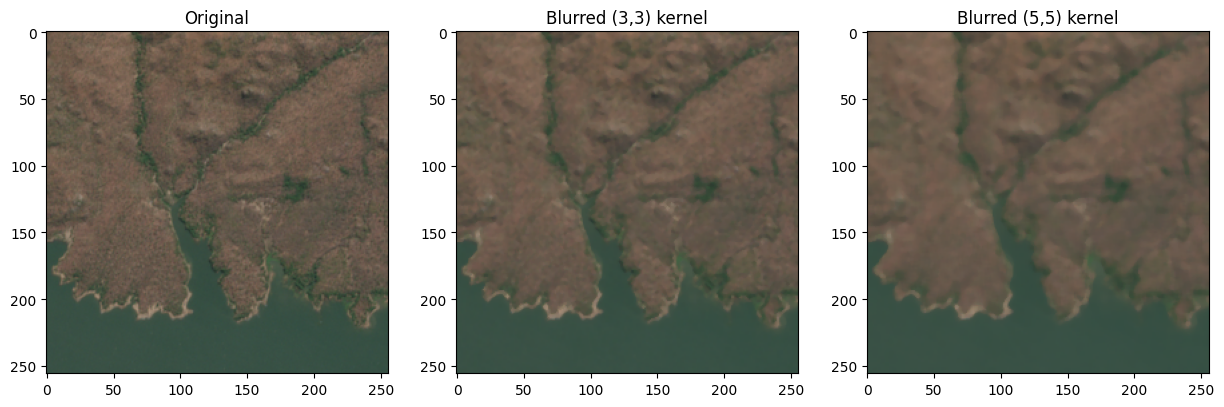

In [15]:
img = np.array(input[0][:,:,:3], np.uint8)
blured = cv.medianBlur(img, 3)
blured2 = cv.medianBlur(img, 5)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(img)
axs[0].set_title('Original')
axs[1].imshow(blured)
axs[1].set_title('Blurred (3,3) kernel')
axs[2].imshow(blured2)
axs[2].set_title('Blurred (5,5) kernel')
plt.show()